In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pytesseract
import re

from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Example path on Windows


In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

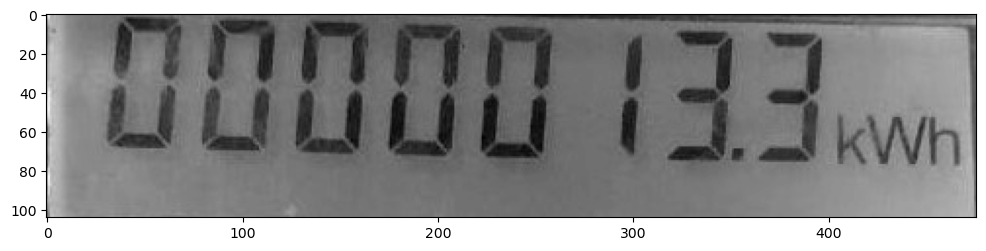

In [3]:
fm = cv2.imread('./Images/fm1.jpg',0)
display(fm)

In [24]:
img1 = cv2.imread('./Images/img1.jpg',0) 
img2 = cv2.imread('./Images/img2.jpg',0) 
img3 = cv2.imread('./Images/img3.jpg',0) 
img4 = cv2.imread('./Images/img4.jpg',0) 
img5 = cv2.imread('./Images/img5.jpg',0) 
img6 = cv2.imread('./Images/img6.jpg',0) 
img7 = cv2.imread('./Images/img7.jpg',0) 
img8 = cv2.imread('./Images/img8.jpg',0) 
img9 = cv2.imread('./Images/img9.jpg',0) 
img10 = cv2.imread('./Images/img10.jpg',0) 
img11 = cv2.imread('./Images/img12.jpg',0) 


In [35]:
def fm_bf(source_image, target_image):
    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = sift.detectAndCompute(source_image, None)
    keypoints2, descriptors2 = sift.detectAndCompute(target_image, None)

    # Create BFMatcher
    bf = cv2.BFMatcher()

    # Match keypoints
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Check if there are enough good matches
    if len(good_matches) > 4:
        source_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        target_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Estimate homography
        homography, _ = cv2.findHomography(source_points, target_points, cv2.RANSAC, 5.0)

        # Warp the source image to the target image
        warped_image = cv2.warpPerspective(source_image, homography, (target_image.shape[1], target_image.shape[0]))
        display(warped_image)

        # Now 'warped_image' contains the complete picture mapped to the part of 'target_image'
    else:
        print("Not enough good matches.")
    return warped_image

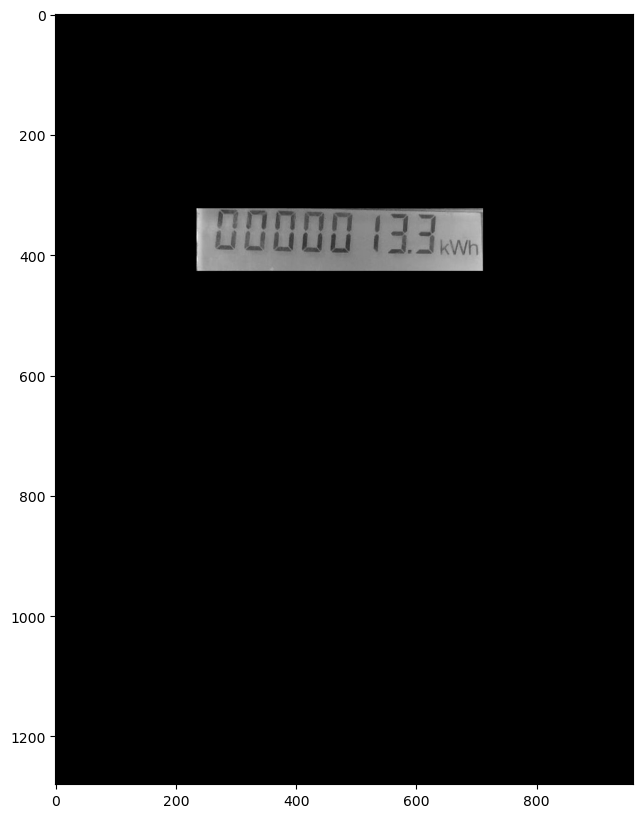

In [60]:
wraped_image = fm_bf(fm, img1)

In [61]:
custom_config = r'--psm 10'  # PSM_SINGLE_CHAR
ocr_result = pytesseract.image_to_string(wraped_image, config=custom_config)


In [62]:
ocr_result

'HETREE\n'

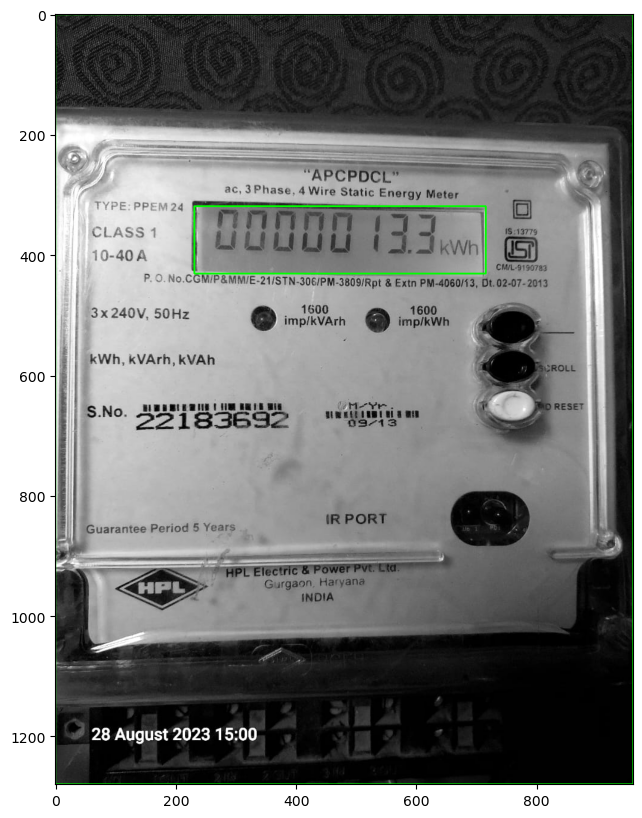

In [56]:
image = img1
d = pytesseract.image_to_data(wraped_image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
display(boxes)

In [58]:
wrapped_image = cv2.resize(wraped_image, (800, 800))

_, thresholded_wrapped_image = cv2.threshold(wrapped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


ocr_result = pytesseract.image_to_string(thresholded_wrapped_image)

In [59]:
ocr_result

''

In [15]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(fm,None)
kp2, des2 = orb.detectAndCompute(img1,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
fm_match = cv2.drawMatches(fm,kp1,img1,kp2,matches[:1],None,flags=2)

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)


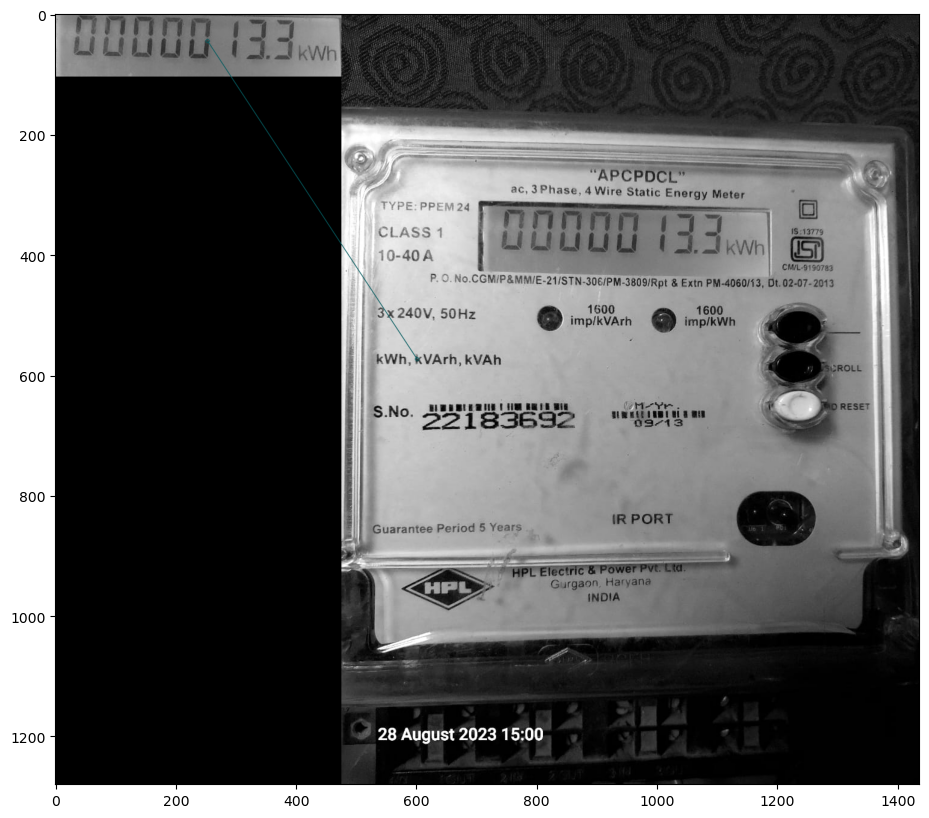

In [10]:
display(fm_match)